In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# load dataset 
iris = datasets.load_iris()

# x = sepal.length, y = petal_length

In [5]:
predictor_vals = np.array([predictors[0] for predictors in iris.data])
target_vals = np.array([predictors[2] for predictors in iris.data])

In [8]:
# data spliting 
X_train, X_test, y_train,y_test = train_test_split(predictor_vals,target_vals,test_size =0.2)

In [12]:
# place holder initialization 
predictor = tf.placeholder(shape=[None,1], dtype =tf.float32)
target = tf.placeholder(shape=[None,1],dtype =tf.float32)

In [15]:
# create weight and bias matrics 
A = tf.Variable(tf.zeros([1,1]))
B = tf.Variable(tf.ones([1,1]))

In [17]:
# model operation 
model_output = tf.add(tf.matmul(predictor,A),B)

In [24]:
# decalre optimizer and loss 
# working with L1 loss : abs(pred-actual)

loss = tf.reduce_mean(tf.abs(target-model_output))

# optimizer 
my_opt = tf.train.GradientDescentOptimizer(0.01)

train_stp = my_opt.minimize(loss)

In [25]:
# initialize variables and sessions 

sess = tf.Session()
init = tf.global_variables_initializer()

sess.run(init)

In [26]:
# model fitting 
lossArray = []
batchsize = 40 
for i in range(200):
    rand_rows = np.random.randint(0,len(X_train)-1,size=batchsize)
    batchX = np.transpose([X_train[rand_rows]])
    batchy = np.transpose([y_train[rand_rows]])
    
    sess.run(train_stp, feed_dict={predictor:batchX,target:batchy})
    
    batchloss = sess.run(loss, feed_dict ={predictor:batchX,target:batchy})
    
    lossArray.append(batchloss)
    
    if (i+1)%50 ==0:
        print('step Number' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b  ' + str(sess.run(B)))
        print('\n L1 loss ' + str(batchloss))
        

[slope]= sess.run(A)
[intercept] = sess.run(B)    

step Number50 A = [[0.5388749]] b  [[1.0460004]]

 L1 loss 1.2637888
step Number100 A = [[0.57269984]] b  [[1.004]]

 L1 loss 1.2396362
step Number150 A = [[0.5750998]] b  [[0.9555]]

 L1 loss 1.1221101
step Number200 A = [[0.56350005]] b  [[0.9035004]]

 L1 loss 1.4753287


In [27]:
# working on test data 
# model fitting 
lossArray = []
batchsize = 30 
for i in range(100):
    rand_rows = np.random.randint(0,len(X_test)-1,size=batchsize)
    batchX = np.transpose([X_test[rand_rows]])
    batchy = np.transpose([y_test[rand_rows]])
    
    sess.run(train_stp, feed_dict={predictor:batchX,target:batchy})
    
    batchloss = sess.run(loss, feed_dict ={predictor:batchX,target:batchy})
    
    lossArray.append(batchloss)
    
    if (i+1)%50 ==0:
        print('step Number' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b  ' + str(sess.run(B)))
        print('\n L1 loss ' + str(batchloss))
        

[slope]= sess.run(A)
[intercept] = sess.run(B)    

step Number50 A = [[0.5965333]] b  [[0.87283367]]

 L1 loss 1.1561805
step Number100 A = [[0.59820026]] b  [[0.83683395]]

 L1 loss 1.1945577


Text(0.5, 0, 'Sepal length')

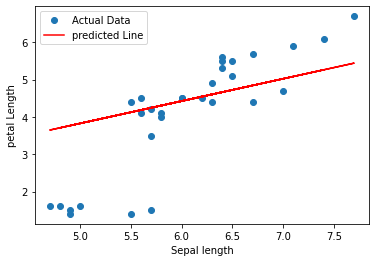

In [28]:
# original data and loss 
plt.plot(X_test,y_test,'o',label='Actual Data')

tst_fit = []
for i in X_test:
    tst_fit.append(slope*i+intercept)
    
plt.plot(X_test,tst_fit,'r-',label='predicted Line')
plt.legend()
plt.ylabel ('petal Length')
plt.xlabel('Sepal length')

Text(0, 0.5, 'L1 loss')

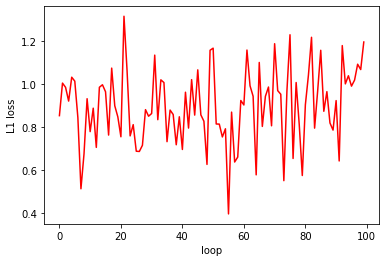

In [30]:
plt.plot(lossArray,'r-')
plt.xlabel('loop')
plt.ylabel('L1 loss')